In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

In [2]:
def generateSeparatableData(n):
    """
    产生线性可分的数据集
    """
    np.random.seed(2046)
    X = np.r_[np.random.randn(n, 2) - [1, 1], np.random.randn(n, 2) + [3, 3]]
    Y = [[0]] * n + [[1]] * n
    data = np.concatenate((Y, X), axis=1)
    data = pd.DataFrame(data, columns=["y", "x1", "x2"])
    return data

In [9]:
generateSeparatableData(2)

,y,x1,x2
0,0.0,-0.784934,-0.115833
1,0.0,-2.160885,-1.215616
2,1.0,4.160988,1.479918
3,1.0,2.963956,1.855861


In [5]:
def generateInseparatableData(n):
    """
    产生线性不可分的数据集
    """
    data = generateSeparatableData(n)
    inseparatable = [[1, -1, 1.5], [0, 3, 1]]
    inseparatable = pd.DataFrame(inseparatable, columns=["y", "x1", "x2"])
    data = data.append(inseparatable)
    return data

In [6]:
generateInseparatableData(2)

,y,x1,x2
0,0.0,-0.784934,-0.115833
1,0.0,-2.160885,-1.215616
2,1.0,4.160988,1.479918
3,1.0,2.963956,1.855861
0,1.0,-1.000000,1.500000
1,0.0,3.000000,1.000000


## 线性可分的SVM模型

In [11]:
def trainModel(data):
    """
    训练SVM模型
    """
    # 将惩罚系数设为很大，使模型接近于线性可分时的模型
    model = SVC(C=1e4, kernel="linear")
    model.fit(data[["x1", "x2"]], data["y"])
    return model

In [24]:
def visualize(data, model=None):
    """
    将模型结果可视化
    """
    # 创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    # 在图形框里画一幅图
    ax = fig.add_subplot(1, 1, 1)
    label1 = data[data["y"]>0]
    ax.scatter(label1[["x1"]], label1[["x2"]], marker="o")
    label0 = data[data["y"]==0]
    ax.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")
    if model is not None:
        w = model.coef_
        a = -w[0][0] / w[0][1]
        xx = np.linspace(-3, 5)
        yy = a * xx - (model.intercept_) / w[0][1]
        yy_down = yy - 1 / w[0][1]
        yy_up = yy + 1 / w[0][1]
        ax.plot(xx, yy, "r")
        ax.plot(xx, yy_down, "r--")
        ax.plot(xx, yy_up, "r--")
    plt.show()

In [25]:
data = generateSeparatableData(20)
data1 = generateInseparatableData(20)

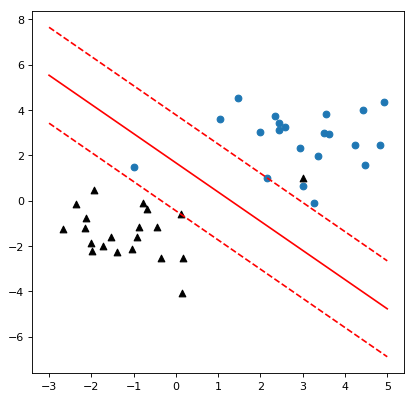

In [26]:
re = trainModel(data)
visualize(data1, re)

In [47]:
def generateData(n):
    """
    生成模型所需数据
    """
    np.random.seed(2046)
    X = np.r_[np.random.randn(n, 2) - [1, 1], np.random.randn(n, 2) + [3, 3]]
    Y = [[0]] * n + [[1]] * n
    data = np.concatenate((Y, X), axis=1)
    data = pd.DataFrame(data, columns=["y", "x1", "x2"])
    hardMargin = [[0, 0, 2], [1, 1, -1]]
    hardMargin = pd.DataFrame(hardMargin, columns=["y", "x1", "x2"])
    data = data.append(hardMargin)
    return data

In [48]:
def hardSoftMargin(data):
    """
    从小到大，用不同的损失系数训练模型
    """
    C = []
    re = []
    
    for i in range(-1, 5):
        C_ = 10 ** i
        model = SVC(C = C_, kernel = 'linear')
        model.fit(data[['x1','x2']], data['y'])
        re.append(model)
        C.append(C_)
    visualise(data, C, re)

In [49]:
def visualise(data, C, re):
    """
    可视化模型
    """
    fig = plt.figure(figsize=(12,6), dpi=80)
    
    ax = fig.add_subplot(1, 2, 1)
    label1 = data[data['y']>0]
    ax.scatter(label1['x1'], label1['x2'], marker='o')
    label0 = data[data['y']==0]
    ax.scatter(label0['x1'], label0['x2'], marker='^', color = 'k')
    x1 = np.linspace(-4, 6, 100)
    x2 = np.linspace(-8, 8, 100)
    X1, X2 = np.meshgrid(x1, x2)
    #Soft margin
    soft = re[0].decision_function(np.c_[X1.ravel(),X2.ravel()])
    soft = soft.reshape(X1.shape)
    CS = ax.contour(X1, X2, soft, levels=[-1, 0, 1], colors=['r','r','r'], linestyles=['--','-','--'])
    
    #hard margin
    hard = re[-1].decision_function(np.c_[X1.ravel(),X2.ravel()])
    hard = soft.reshape(X1.shape)
    ax.contour(X1, X2, hard, levels=[-1, 0, 1], colors=['g','g','g'], linestyles=['--','-.','--'])
    ax1 = fig.add_subplot(1,2,2)
    
    coef = list(map(lambda x: x.coef_, re))
    margin = list(map(lambda x: 2.0 / np.sqrt(x.dot(x.T)).item(), coef))
    ax1.plot(C, margin, label='margin width')
    ax1.set_xscale('log')
    legend = plt.legend(shadow=True, loc='best')
    


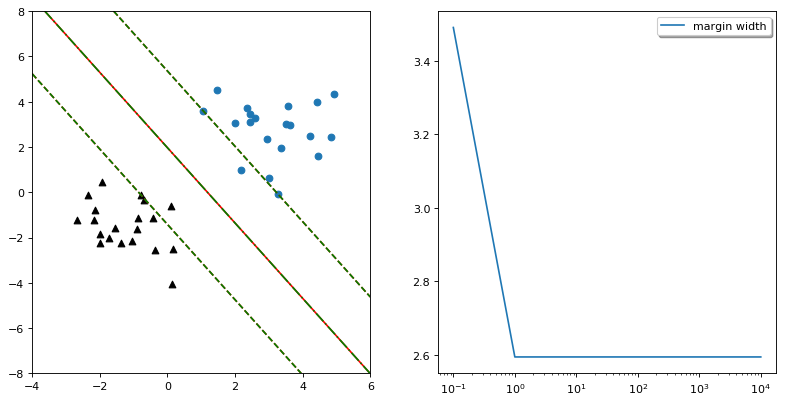

In [50]:
generateData(20)
hardSoftMargin(data)